In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso

In [35]:
df_housing = pd.read_csv('HousingData.csv')
df_housing.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,NaN,2.5050,1,273,21.0,396.90,7.88,11.9


In [36]:
df_housing.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [37]:
X = df_housing.iloc[:, :-1].values
y = df_housing.iloc[:, -1].values

In [38]:
# Iterate over each column in the DataFrame
for column in df_housing.columns:
    # Calculate the mean of the current column
    column_mean = df_housing[column].mean()
    
    # Fill NaN values in the current column with its mean
    df_housing[column].fillna(column_mean, inplace=True)

In [39]:
names = df_housing.columns.drop('MEDV')
names

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [40]:
df_housing.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [41]:
alpha = 0.1
lasso = Lasso(alpha= alpha)
lasso.fit(X, y)

ValueError: Input X contains NaN.
Lasso does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
coeff = lasso.coef_
coeff

In [42]:
intercept = lasso.intercept_

AttributeError: 'Lasso' object has no attribute 'intercept_'

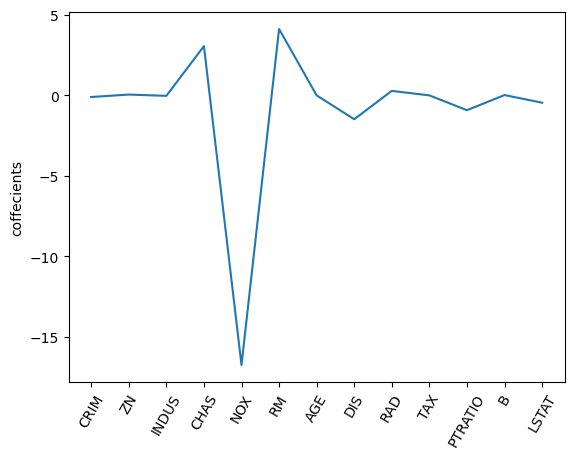

In [43]:
plt.plot(range(len(names)),coeff)
plt.xticks(range(len(names)),names,rotation = 60)  # حجزت 13 مكان ل 13 اسم دوران الكلمه 60
plt.ylabel('coffecients')
plt.show()

In [ ]:
import seaborn as sns
sns.pairplot(df_housing)

In [ ]:
sns.scatterplot(x='RM', y='MEDV', data=df_housing)